In [11]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from statsmodels.tsa.holtwinters import SimpleExpSmoothing as ses

import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
gld = pdr.get_data_yahoo('GLD', start='2020-05-31')
gld.drop('Adj Close', axis=1, inplace=True)
gld = gld.resample('W').last()
gld.tail()

,High,Low,Open,Close,Volume
Date,,,,,
2021-05-09,172.550003,171.000000,171.529999,171.589996,14747700
2021-05-16,172.699997,171.820007,172.050003,172.690002,9683000
2021-05-23,176.860001,175.149994,176.580002,176.039993,7677200
2021-05-30,178.429993,177.240005,177.460007,178.380005,9967000
2021-06-06,178.779999,177.970001,178.339996,178.770004,6560228


In [13]:
model = ses(gld['Close'])
model_fit = model.fit()
model_fit.predict()

c:\users\sasha\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


2021-06-13    178.767058
Freq: W-SUN, dtype: float64

In [14]:
y_hat = model_fit.fittedvalues
y_hat.head()

Date
2020-06-07    158.043432
2020-06-14    158.010237
2020-06-21    162.586632
2020-06-28    164.019553
2020-07-05    166.521752
Freq: W-SUN, dtype: float64

In [15]:
gld.head()

,High,Low,Open,Close,Volume
Date,,,,,
2020-06-07,158.720001,157.039993,158.720001,158.009995,16021200
2020-06-14,163.880005,162.559998,163.410004,162.619995,6895400
2020-06-21,164.089996,162.779999,162.869995,164.029999,12187400
2020-06-28,166.559998,164.220001,164.869995,166.539993,9753500
2020-07-05,167.240005,166.020004,166.199997,166.979996,8753500


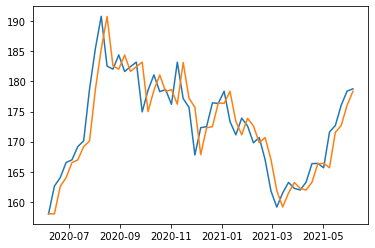

In [16]:
plt.plot(gld['Close'])
plt.plot(y_hat)

In [17]:
model_fit.params

{'smoothing_level': 0.9927625647097573,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 158.0434324221257,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [18]:
values = pd.DataFrame({'alpha':np.zeros(10), 'MSE':np.zeros(10)})
alpha = 0.1
for i in range(10):
    model = ses(gld['Close'])
    gld['Forecast'] = model.fit(alpha).fittedvalues
    gld['MSE'] = (gld['Close']-gld['Forecast']) ** 2
    mse = gld['MSE'].mean()
    values['alpha'][i] = alpha
    values['MSE'][i] = mse
    alpha += 0.1

c:\users\sasha\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [19]:
values

,alpha,MSE
0,0.1,48.061995
1,0.2,35.480389
2,0.3,26.992326
3,0.4,21.728044
4,0.5,18.472510
5,0.6,16.421804
6,0.7,15.116537
7,0.8,14.307475
8,0.9,13.866402
9,1.0,13.737646
